## Project: Predict Bike Sharing Demand with AutoGluon

### Install packages

In [2]:
!pip install -U pip
!pip install -U setuptools wheel
!pip install -U "mxnet<2.0.0" bokeh==2.0.1
!pip install autogluon --no-cache-dir
# Without --no-cache-dir, smaller aws instances may have trouble installing

  Using cached mxnet-1.9.1-py3-none-manylinux2014_x86_64.whl.metadata (3.4 kB)
  Using cached bokeh-2.0.1-py3-none-any.whl
  Using cached graphviz-0.8.4-py2.py3-none-any.whl.metadata (6.4 kB)
Using cached mxnet-1.9.1-py3-none-manylinux2014_x86_64.whl (49.1 MB)
Using cached graphviz-0.8.4-py2.py3-none-any.whl (16 kB)
  Attempting uninstall: bokeh
    Found existing installation: bokeh 3.4.1
    Uninstalling bokeh-3.4.1:
      Successfully uninstalled bokeh-3.4.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
panel 1.4.1 requires bokeh<3.5.0,>=3.4.0, but you have bokeh 2.0.1 which is incompatible.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 41.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.2/57.2 kB 186.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.7/130.7 kB 317.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━

### Setup Kaggle API Key

In [3]:
!mkdir -p /root/.kaggle
!touch /root/.kaggle/kaggle.json
!chmod 600 /root/.kaggle/kaggle.json

In [4]:
!pip install kaggle

  Using cached kaggle-1.6.12-py3-none-any.whl


In [2]:
import json
kaggle_username = "kennethmuyoyo"
kaggle_key = "4a2bf03b9c90668daf7e33e2c7869da2"

with open("/root/.kaggle/kaggle.json", "w") as f:
    f.write(json.dumps({"username": kaggle_username, "key": kaggle_key}))

### Download and explore dataset

In [3]:
!kaggle competitions download -c bike-sharing-demand
!unzip -o bike-sharing-demand.zip

bike-sharing-demand.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  bike-sharing-demand.zip
  inflating: sampleSubmission.csv    
  inflating: test.csv                
  inflating: train.csv               


In [4]:
import pandas as pd
from autogluon.tabular import TabularPredictor

In [5]:
train = pd.read_csv('train.csv', parse_dates=['datetime'])
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [6]:
train.describe()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2011-12-27 05:56:22.399411968,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
min,2011-01-01 00:00:00,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2011-07-02 07:15:00,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,2012-01-01 20:30:00,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,2012-07-01 12:45:00,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,2012-12-19 23:00:00,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000
std,NaN,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454


In [7]:
test = pd.read_csv('test.csv', parse_dates=['datetime'])
test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


In [8]:
submission = pd.read_csv('sampleSubmission.csv')
submission.head()

,datetime,count
0,2011-01-20 00:00:00,0
1,2011-01-20 01:00:00,0
2,2011-01-20 02:00:00,0
3,2011-01-20 03:00:00,0
4,2011-01-20 04:00:00,0


## Step 3: Train a model using AutoGluon’s Tabular Prediction

Requirements:
* We are predicting `count`, so it is the label we are setting.
* Ignore `casual` and `registered` columns as they are also not present in the test dataset. 
* Use the `root_mean_squared_error` as the metric to use for evaluation.
* Set a time limit of 10 minutes (600 seconds).
* Use the preset `best_quality` to focus on creating the best model.

In [12]:
pip install -U ipywidgets

  Using cached ipywidgets-8.1.2-py3-none-any.whl.metadata (2.4 kB)
  Using cached widgetsnbextension-4.0.10-py3-none-any.whl.metadata (1.6 kB)
Using cached ipywidgets-8.1.2-py3-none-any.whl (139 kB)
Using cached widgetsnbextension-4.0.10-py3-none-any.whl (2.3 MB)
  Attempting uninstall: widgetsnbextension
    Found existing installation: widgetsnbextension 3.5.2
    Uninstalling widgetsnbextension-3.5.2:
      Successfully uninstalled widgetsnbextension-3.5.2
  Attempting uninstall: ipywidgets
    Found existing installation: ipywidgets 7.6.5
    Uninstalling ipywidgets-7.6.5:
      Successfully uninstalled ipywidgets-7.6.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
sagemaker-datawrangler 0.4.3 requires ipywidgets<8.0.0, but you have ipywidgets 8.1.2 which is incompatible.
sagemaker-datawrangler 0.4.3 requires sagemaker-data-insights==0.4.0, but you have s

In [9]:
from autogluon.tabular import TabularPredictor

label = 'count'
ignored_columns = ['casual', 'registered']

# Remove ignored columns from the training dataset
train_processed = train.drop(columns=ignored_columns)

# Initialize the TabularPredictor with the eval_metric specified
predictor = TabularPredictor(label=label, path='ag_models', verbosity=2, eval_metric='root_mean_squared_error')

# Fit the model with the specified parameters
predictor.fit(train_processed, time_limit=600, presets='best_quality')

Presets specified: ['best_quality']
Setting dynamic_stacking from 'auto' to True. Reason: Enable dynamic_stacking when use_bag_holdout is disabled. (use_bag_holdout=False)
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=1
Dynamic stacking is enabled (dynamic_stacking=True). AutoGluon will try to determine whether the input data is affected by stacked overfitting and enable or disable stacking as a consequence.
Detecting stacked overfitting by sub-fitting AutoGluon on the input data. That is, copies of AutoGluon will be sub-fit on subset(s) of the data. Then, the holdout validation data is used to detect stacked overfitting.
Sub-fit(s) time limit is: 600 seconds.
Starting holdout-based sub-fit for dynamic stacking. Context path is: ag_models/ds_sub_fit/sub_fit_ho.
Running the sub-fit in a ray process to avoid memory leakage.
Spend 186 seconds for the sub-fit(s) during dynamic stacking.
Time left for full fit of AutoGluon: 414 seconds.
Starting fu

 ### Review AutoGluon's training run with ranking of models that did the best.

In [10]:
Summary= predictor.fit_summary(verbosity=-1)
Summary['model_hyperparams']

{'KNeighborsUnif_BAG_L1': {'use_orig_features': True,
  'max_base_models': 25,
  'max_base_models_per_type': 5,
  'save_bag_folds': True,
  'use_child_oof': True},
 'KNeighborsDist_BAG_L1': {'use_orig_features': True,
  'max_base_models': 25,
  'max_base_models_per_type': 5,
  'save_bag_folds': True,
  'use_child_oof': True},
 'LightGBMXT_BAG_L1': {'use_orig_features': True,
  'max_base_models': 25,
  'max_base_models_per_type': 5,
  'save_bag_folds': True},
 'LightGBM_BAG_L1': {'use_orig_features': True,
  'max_base_models': 25,
  'max_base_models_per_type': 5,
  'save_bag_folds': True},
 'RandomForestMSE_BAG_L1': {'use_orig_features': True,
  'max_base_models': 25,
  'max_base_models_per_type': 5,
  'save_bag_folds': True,
  'use_child_oof': True},
 'CatBoost_BAG_L1': {'use_orig_features': True,
  'max_base_models': 25,
  'max_base_models_per_type': 5,
  'save_bag_folds': True},
 'ExtraTreesMSE_BAG_L1': {'use_orig_features': True,
  'max_base_models': 25,
  'max_base_models_per_type'

In [11]:
Summary['model_types']

{'KNeighborsUnif_BAG_L1': 'StackerEnsembleModel_KNN',
 'KNeighborsDist_BAG_L1': 'StackerEnsembleModel_KNN',
 'LightGBMXT_BAG_L1': 'StackerEnsembleModel_LGB',
 'LightGBM_BAG_L1': 'StackerEnsembleModel_LGB',
 'RandomForestMSE_BAG_L1': 'StackerEnsembleModel_RF',
 'CatBoost_BAG_L1': 'StackerEnsembleModel_CatBoost',
 'ExtraTreesMSE_BAG_L1': 'StackerEnsembleModel_XT',
 'NeuralNetFastAI_BAG_L1': 'StackerEnsembleModel_NNFastAiTabular',
 'WeightedEnsemble_L2': 'WeightedEnsembleModel',
 'LightGBMXT_BAG_L2': 'StackerEnsembleModel_LGB',
 'LightGBM_BAG_L2': 'StackerEnsembleModel_LGB',
 'RandomForestMSE_BAG_L2': 'StackerEnsembleModel_RF',
 'WeightedEnsemble_L3': 'WeightedEnsembleModel'}

In [12]:
Summary['model_performance']

{'KNeighborsUnif_BAG_L1': -101.54619908446061,
 'KNeighborsDist_BAG_L1': -84.12506123181602,
 'LightGBMXT_BAG_L1': -131.46090891834504,
 'LightGBM_BAG_L1': -131.054161598899,
 'RandomForestMSE_BAG_L1': -116.54835939455667,
 'CatBoost_BAG_L1': -130.59496396592982,
 'ExtraTreesMSE_BAG_L1': -124.60067564699747,
 'NeuralNetFastAI_BAG_L1': -140.62159040540192,
 'WeightedEnsemble_L2': -84.12506123181602,
 'LightGBMXT_BAG_L2': -60.218678795679615,
 'LightGBM_BAG_L2': -55.17234090849628,
 'RandomForestMSE_BAG_L2': -53.4387564663295,
 'WeightedEnsemble_L3': -53.15706018665353}

### Create predictions from test dataset

In [13]:
predictions = predictor.predict(test)
predictions.head()

0    23.200344
1    42.163673
2    45.749870
3    47.927467
4    50.305443
Name: count, dtype: float32

In [14]:
predictions.describe()

count    6493.000000
mean      100.797157
std        89.998589
min         2.902294
25%        20.056116
50%        63.992844
75%       166.855362
max       367.230682
Name: count, dtype: float64

In [15]:
print(len(predictions[predictions < 0]))

0


In [16]:
predictions[predictions < 0] = 0

### Set predictions to submission dataframe, save, and submit

In [17]:
submission["count"] = predictions
submission.to_csv("submission.csv", index=False)

In [18]:
!kaggle competitions submit -c bike-sharing-demand -f submission.csv -m "first raw submission"

100%|█████████████████████████████████████████| 188k/188k [00:00<00:00, 730kB/s]
Successfully submitted to Bike Sharing Demand

#### View submission via the command line or in the web browser under the competition's page - `My Submissions`

In [19]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 6

fileName                     date                 description                        status    publicScore  privateScore  
---------------------------  -------------------  ---------------------------------  --------  -----------  ------------  
submission.csv               2024-05-10 16:01:59  first raw submission               pending                              
submission_new_hpo.csv       2024-05-10 15:22:35  new features with hyperparameters  complete  0.71417      0.71417       
submission_new_features.csv  2024-05-10 05:38:50  new features                       complete  0.62469      0.62469       
submission.csv               2024-05-10 05:09:46  first raw submission               complete  1.79888      1.79888       


#### Initial score of 1.80024

## Step 4: Exploratory Data Analysis and Creating an additional feature


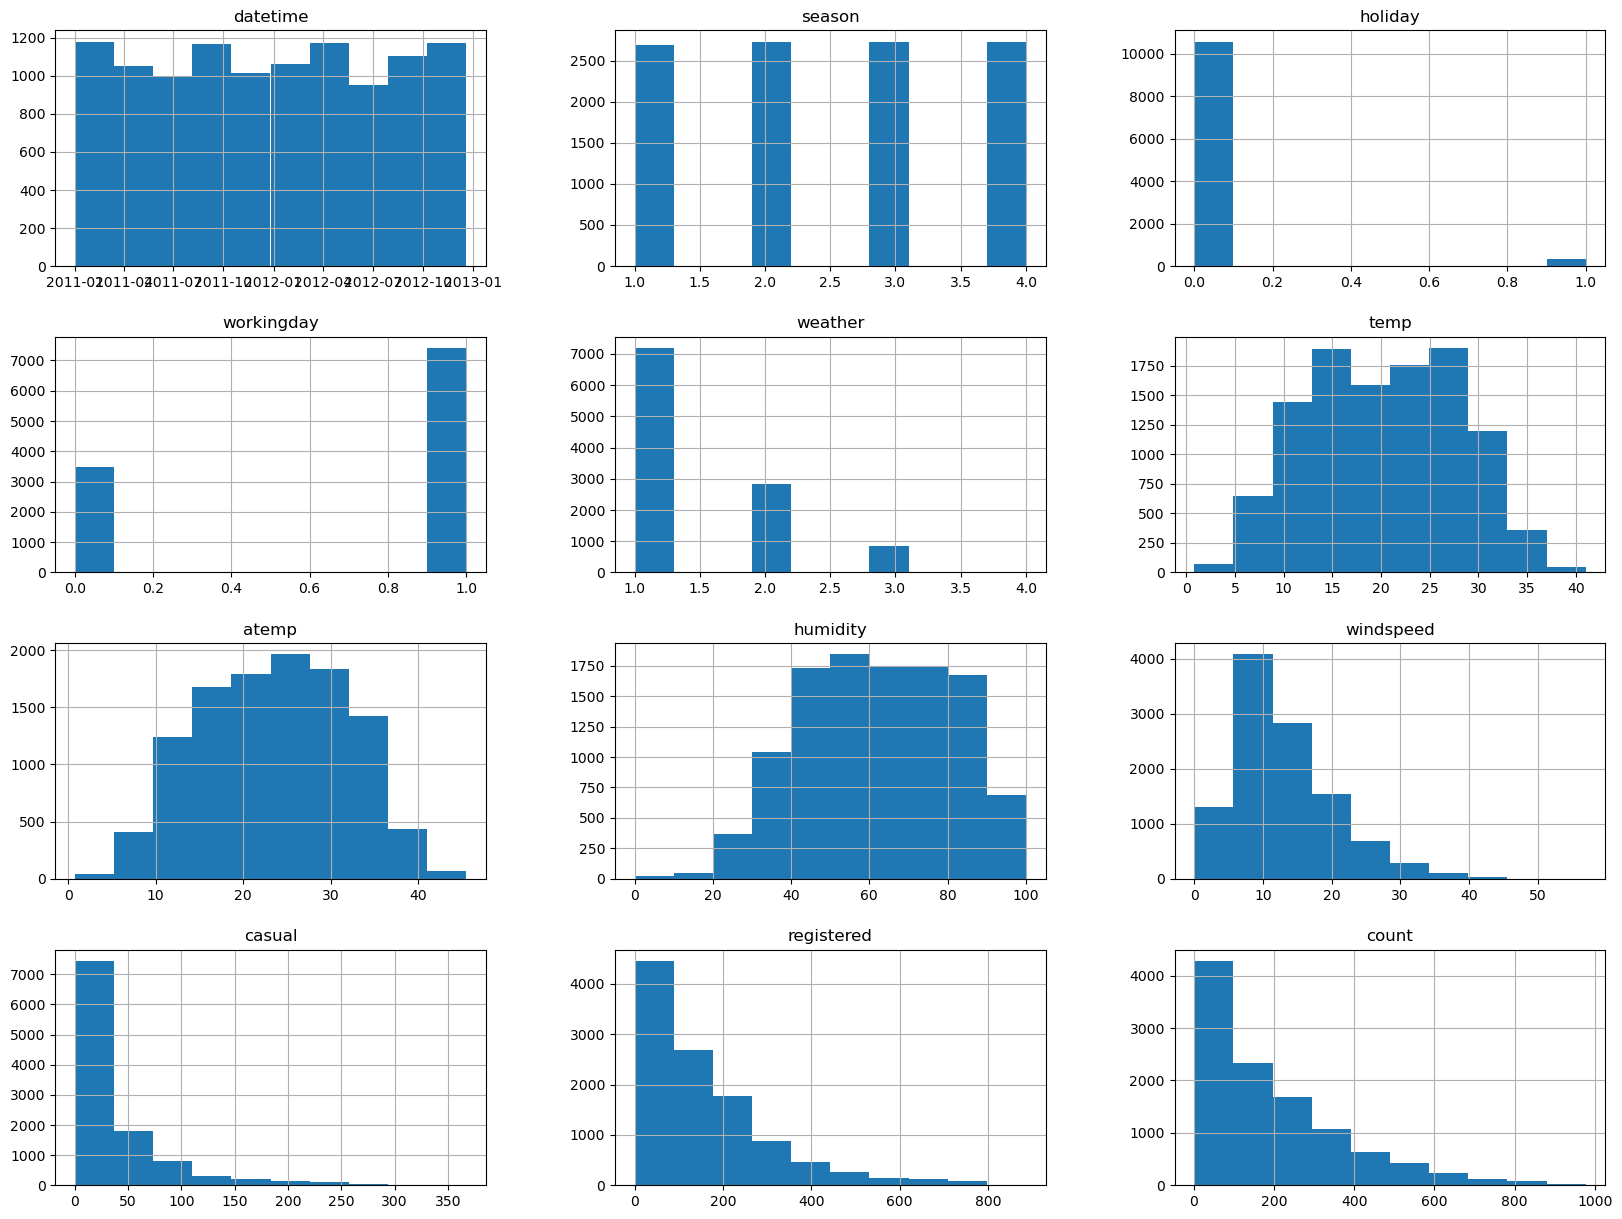

In [20]:
import matplotlib.pyplot as plt
import pandas as pd

train = pd.read_csv('train.csv', parse_dates=['datetime'])
train.head()

train.hist(figsize=(20,15))
plt.show()

In [21]:
train['hour'] = train['datetime'].dt.hour
test['hour'] = test['datetime'].dt.hour

## Make category types for these so models know they are not just numbers

In [22]:
train['season'] = train['season'].astype('category')
train['weather'] = train['weather'].astype('category')
test['season'] = test['season'].astype('category')
test['weather'] = test['weather'].astype('category')

In [23]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,hour
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,3
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,4


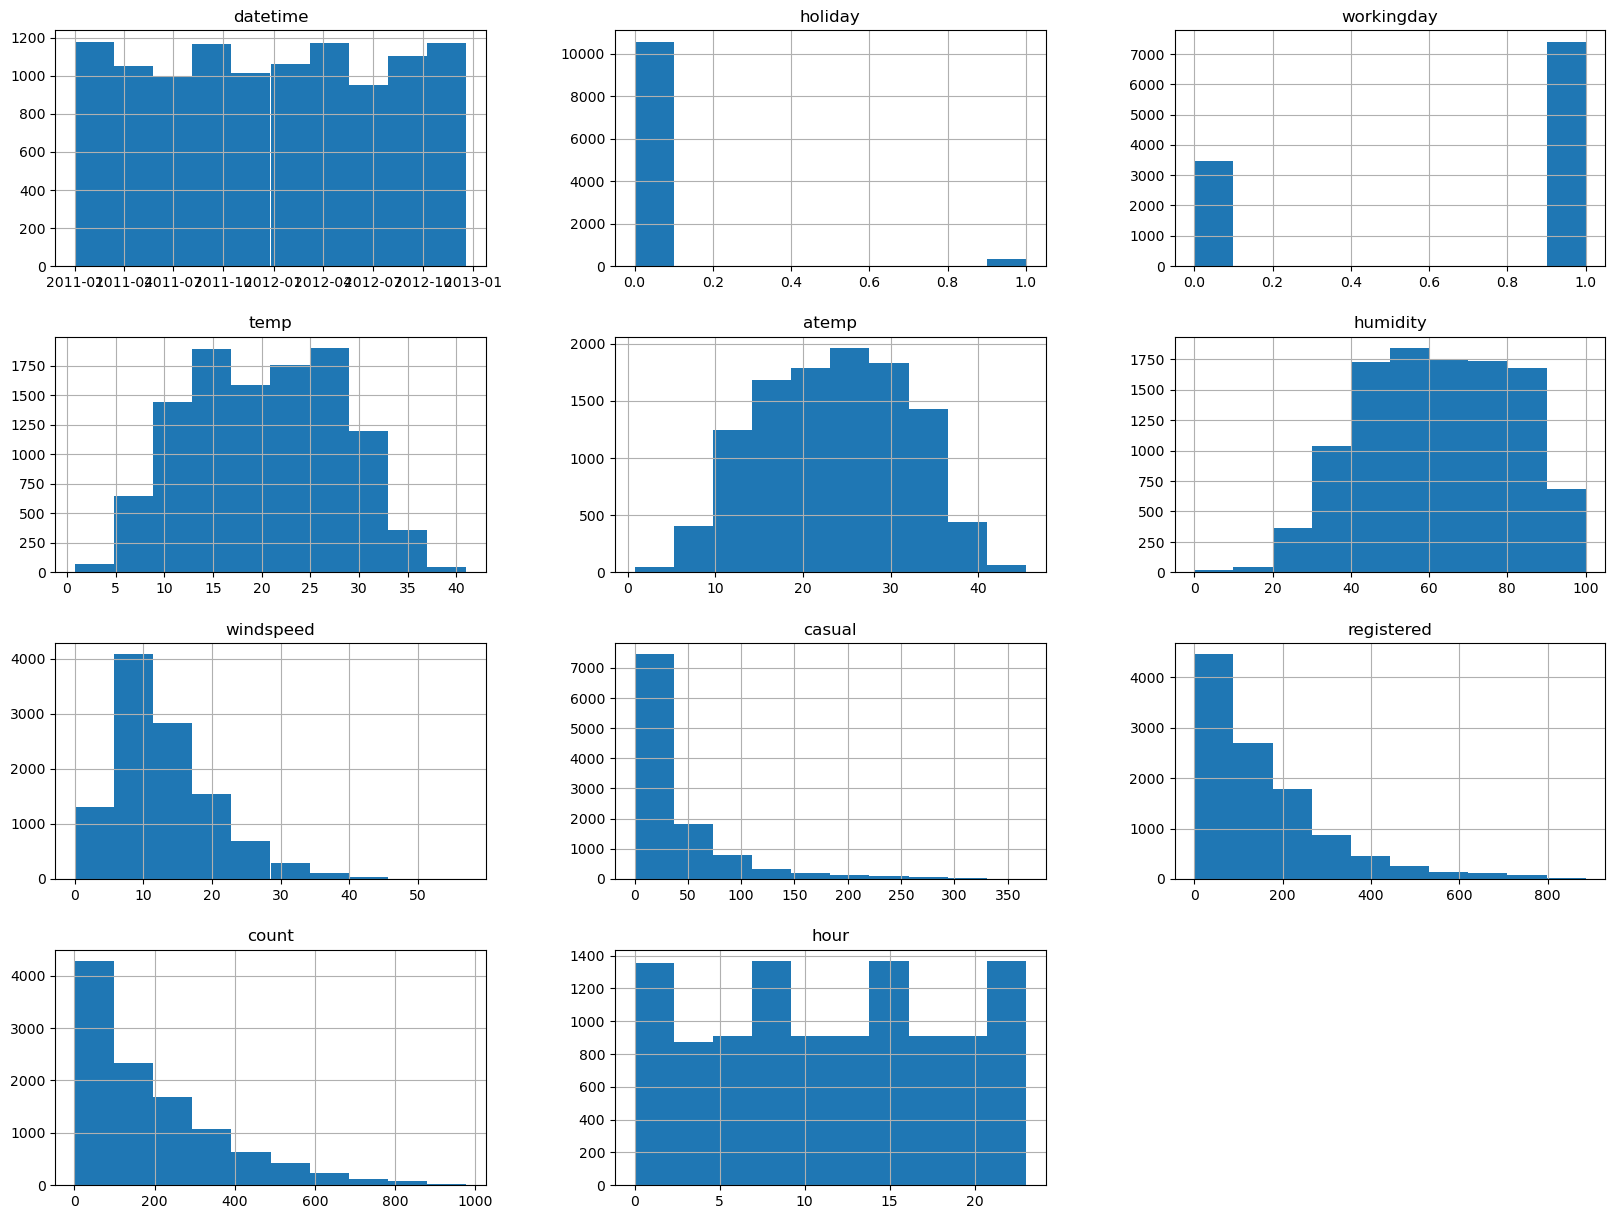

In [24]:
train.hist(figsize=(20,15))
plt.show()

## Step 5: Rerun the model with the same settings as before, just with more features

In [25]:
from autogluon.tabular import TabularPredictor

label = 'count'
ignored_columns = ['casual', 'registered']

train_processed2 = train.drop(columns=ignored_columns)

predictor_new_features = TabularPredictor(label=label, path='ag_models', verbosity=2, eval_metric='root_mean_squared_error')

predictor_new_features.fit(train_processed2, time_limit=600, presets='best_quality')

Presets specified: ['best_quality']
Setting dynamic_stacking from 'auto' to True. Reason: Enable dynamic_stacking when use_bag_holdout is disabled. (use_bag_holdout=False)
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=1
Dynamic stacking is enabled (dynamic_stacking=True). AutoGluon will try to determine whether the input data is affected by stacked overfitting and enable or disable stacking as a consequence.
Detecting stacked overfitting by sub-fitting AutoGluon on the input data. That is, copies of AutoGluon will be sub-fit on subset(s) of the data. Then, the holdout validation data is used to detect stacked overfitting.
Sub-fit(s) time limit is: 600 seconds.
Starting holdout-based sub-fit for dynamic stacking. Context path is: ag_models/ds_sub_fit/sub_fit_ho.
Running the sub-fit in a ray process to avoid memory leakage.
Spend 183 seconds for the sub-fit(s) during dynamic stacking.
Time left for full fit of AutoGluon: 417 seconds.
Starting fu

In [26]:
Summary_new_features= predictor_new_features.fit_summary(verbosity=-1)
Summary_new_features['model_hyperparams']

{'KNeighborsUnif_BAG_L1': {'use_orig_features': True,
  'max_base_models': 25,
  'max_base_models_per_type': 5,
  'save_bag_folds': True,
  'use_child_oof': True},
 'KNeighborsDist_BAG_L1': {'use_orig_features': True,
  'max_base_models': 25,
  'max_base_models_per_type': 5,
  'save_bag_folds': True,
  'use_child_oof': True},
 'LightGBMXT_BAG_L1': {'use_orig_features': True,
  'max_base_models': 25,
  'max_base_models_per_type': 5,
  'save_bag_folds': True},
 'LightGBM_BAG_L1': {'use_orig_features': True,
  'max_base_models': 25,
  'max_base_models_per_type': 5,
  'save_bag_folds': True},
 'RandomForestMSE_BAG_L1': {'use_orig_features': True,
  'max_base_models': 25,
  'max_base_models_per_type': 5,
  'save_bag_folds': True,
  'use_child_oof': True},
 'CatBoost_BAG_L1': {'use_orig_features': True,
  'max_base_models': 25,
  'max_base_models_per_type': 5,
  'save_bag_folds': True},
 'ExtraTreesMSE_BAG_L1': {'use_orig_features': True,
  'max_base_models': 25,
  'max_base_models_per_type'

In [27]:
Summary_new_features['model_types']

{'KNeighborsUnif_BAG_L1': 'StackerEnsembleModel_KNN',
 'KNeighborsDist_BAG_L1': 'StackerEnsembleModel_KNN',
 'LightGBMXT_BAG_L1': 'StackerEnsembleModel_LGB',
 'LightGBM_BAG_L1': 'StackerEnsembleModel_LGB',
 'RandomForestMSE_BAG_L1': 'StackerEnsembleModel_RF',
 'CatBoost_BAG_L1': 'StackerEnsembleModel_CatBoost',
 'ExtraTreesMSE_BAG_L1': 'StackerEnsembleModel_XT',
 'NeuralNetFastAI_BAG_L1': 'StackerEnsembleModel_NNFastAiTabular',
 'WeightedEnsemble_L2': 'WeightedEnsembleModel',
 'LightGBMXT_BAG_L2': 'StackerEnsembleModel_LGB',
 'LightGBM_BAG_L2': 'StackerEnsembleModel_LGB',
 'RandomForestMSE_BAG_L2': 'StackerEnsembleModel_RF',
 'CatBoost_BAG_L2': 'StackerEnsembleModel_CatBoost',
 'WeightedEnsemble_L3': 'WeightedEnsembleModel'}

In [50]:
Summary_new_features['model_performance']

{'KNeighborsUnif_BAG_L1': -101.54619908446061,
 'KNeighborsDist_BAG_L1': -84.12506123181602,
 'LightGBMXT_BAG_L1': -34.457273921492806,
 'LightGBM_BAG_L1': -33.919639163586254,
 'RandomForestMSE_BAG_L1': -38.4543378929385,
 'CatBoost_BAG_L1': -34.6547990127102,
 'ExtraTreesMSE_BAG_L1': -38.326129123608844,
 'NeuralNetFastAI_BAG_L1': -128.52688524103633,
 'WeightedEnsemble_L2': -32.270533890984396,
 'LightGBMXT_BAG_L2': -30.9233087894905,
 'LightGBM_BAG_L2': -30.720077143031908,
 'RandomForestMSE_BAG_L2': -31.64301296179419,
 'CatBoost_BAG_L2': -33.919899529014366,
 'WeightedEnsemble_L3': -30.375110040662154}

In [29]:
predictions_new_features= predictor_new_features.predict(test)
predictions_new_features.head()

0    16.374319
1     9.535861
2     8.654001
3     7.491907
4     6.756216
Name: count, dtype: float32

In [30]:
predictions_new_features.describe

<bound method NDFrame.describe of 0        16.374319
1         9.535861
2         8.654001
3         7.491907
4         6.756216
           ...    
6488    299.730896
6489    206.041138
6490    153.446716
6491    108.576988
6492     67.727982
Name: count, Length: 6493, dtype: float32>

In [31]:
print(len(predictions_new_features[predictions_new_features < 0]))

0


In [32]:
predictions_new_features[predictions_new_features < 0] = 0

In [33]:
print(len(predictions_new_features[predictions_new_features < 0]))

0


### Set predictions to submission dataframe, save, and submit

In [34]:
submission_new_features = pd.read_csv('sampleSubmission.csv')
submission_new_features.head()

,datetime,count
0,2011-01-20 00:00:00,0
1,2011-01-20 01:00:00,0
2,2011-01-20 02:00:00,0
3,2011-01-20 03:00:00,0
4,2011-01-20 04:00:00,0


In [35]:
submission_new_features["count"] = predictions_new_features
submission_new_features.to_csv("submission_new_features.csv", index=False)

In [36]:
!kaggle competitions submit -c bike-sharing-demand -f submission_new_features.csv -m "new features"

100%|█████████████████████████████████████████| 188k/188k [00:00<00:00, 742kB/s]
Successfully submitted to Bike Sharing Demand

In [37]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 6

fileName                     date                 description                        status    publicScore  privateScore  
---------------------------  -------------------  ---------------------------------  --------  -----------  ------------  
submission_new_features.csv  2024-05-10 16:13:19  new features                       pending                              
submission.csv               2024-05-10 16:01:59  first raw submission               complete  1.80024      1.80024       
submission_new_hpo.csv       2024-05-10 15:22:35  new features with hyperparameters  complete  0.71417      0.71417       
submission_new_features.csv  2024-05-10 05:38:50  new features                       complete  0.62469      0.62469       


#### New Score of 0.60385

## Step 6: Hyper parameter optimization
* There are many options for hyper parameter optimization.
* Options are to change the AutoGluon higher level parameters or the individual model hyperparameters.
* The hyperparameters of the models themselves that are in AutoGluon. Those need the `hyperparameter` and `hyperparameter_tune_kwargs` arguments.

In [38]:
from autogluon.tabular import TabularPredictor
import autogluon.common as ag

label = 'count'
ignored_columns = ['casual', 'registered']
train_processed3 = train.drop(columns=ignored_columns)

hyperparameters = {
    'GBM': {
        'num_boost_round': 100,
        'num_leaves': ag.space.Int(lower=20, upper=100, default=25),
        'objective': 'huber',
    },
    'XGB': {
        'sampling_method': 'gradient_based',
    },
    'RF': {
        'max_features': 'log2',
    },
    'XT': {
        'min_samples_leaf': 3,
    }
}

hyperparameter_tune_kwargs = {
    'num_trials': 50,
    'searcher': 'random',
    'scheduler': 'local',
    'resources': {'num_cpus': 4, 'num_gpus': 1}
}

predictor_new_hpo = TabularPredictor(label='count', path='ag_models', verbosity=2, eval_metric='root_mean_squared_error')

predictor_new_hpo.fit(train_processed3, time_limit=600, presets='best_quality', hyperparameters=hyperparameters, hyperparameter_tune_kwargs=hyperparameter_tune_kwargs)

Presets specified: ['best_quality']
Setting dynamic_stacking from 'auto' to True. Reason: Enable dynamic_stacking when use_bag_holdout is disabled. (use_bag_holdout=False)
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=1
Dynamic stacking is enabled (dynamic_stacking=True). AutoGluon will try to determine whether the input data is affected by stacked overfitting and enable or disable stacking as a consequence.
Detecting stacked overfitting by sub-fitting AutoGluon on the input data. That is, copies of AutoGluon will be sub-fit on subset(s) of the data. Then, the holdout validation data is used to detect stacked overfitting.
Sub-fit(s) time limit is: 600 seconds.
Starting holdout-based sub-fit for dynamic stacking. Context path is: ag_models/ds_sub_fit/sub_fit_ho.
Running the sub-fit in a ray process to avoid memory leakage.
Spend 129 seconds for the sub-fit(s) during dynamic stacking.
Time left for full fit of AutoGluon: 471 seconds.
Starting fu

  0%|          | 0/50 [00:00<?, ?it/s]

	Fitting 8 child models (S1F1 - S1F8) | Fitting with ParallelLocalFoldFittingStrategy (2 workers, per: cpus=1, gpus=0, memory=0.16%)
	Fitting 8 child models (S1F1 - S1F8) | Fitting with ParallelLocalFoldFittingStrategy (2 workers, per: cpus=1, gpus=0, memory=0.25%)
	Fitting 8 child models (S1F1 - S1F8) | Fitting with ParallelLocalFoldFittingStrategy (2 workers, per: cpus=1, gpus=0, memory=0.20%)
	Stopping HPO to satisfy time limit...
Fitted model: LightGBM_BAG_L1/T1 ...
	-178.3111	 = Validation score   (-root_mean_squared_error)
	18.88s	 = Training   runtime
	0.0s	 = Validation runtime
Fitted model: LightGBM_BAG_L1/T2 ...
	-176.9451	 = Validation score   (-root_mean_squared_error)
	19.95s	 = Training   runtime
	0.0s	 = Validation runtime
Fitted model: LightGBM_BAG_L1/T3 ...
	-178.182	 = Validation score   (-root_mean_squared_error)
	20.36s	 = Training   runtime
	0.0s	 = Validation runtime
Hyperparameter tuning model: RandomForest_BAG_L1 ... Tuning model for up to 70.61s of the 411.37s 

  0%|          | 0/50 [00:00<?, ?it/s]

	Fitting 8 child models (S1F1 - S1F8) | Fitting with ParallelLocalFoldFittingStrategy (2 workers, per: cpus=1, gpus=0, memory=0.23%)
	Stopping HPO to satisfy time limit...
Fitted model: XGBoost_BAG_L1/T1 ...
	-34.3012	 = Validation score   (-root_mean_squared_error)
	64.77s	 = Training   runtime
	0.0s	 = Validation runtime
Fitting model: WeightedEnsemble_L2 ... Training model for up to 360.0s of the 333.16s of remaining time.
	Ensemble Weights: {'XGBoost_BAG_L1/T1': 0.812, 'ExtraTrees_BAG_L1': 0.188}
	-33.8959	 = Validation score   (-root_mean_squared_error)
	0.03s	 = Training   runtime
	0.0s	 = Validation runtime
Fitting 4 L2 models ...
Hyperparameter tuning model: LightGBM_BAG_L2 ... Tuning model for up to 74.94s of the 333.04s of remaining time.


  0%|          | 0/50 [00:00<?, ?it/s]

	Fitting 8 child models (S1F1 - S1F8) | Fitting with ParallelLocalFoldFittingStrategy (2 workers, per: cpus=1, gpus=0, memory=0.19%)
	Fitting 8 child models (S1F1 - S1F8) | Fitting with ParallelLocalFoldFittingStrategy (2 workers, per: cpus=1, gpus=0, memory=0.34%)
	Fitting 8 child models (S1F1 - S1F8) | Fitting with ParallelLocalFoldFittingStrategy (2 workers, per: cpus=1, gpus=0, memory=0.27%)
	Stopping HPO to satisfy time limit...
Fitted model: LightGBM_BAG_L2/T1 ...
	-177.7525	 = Validation score   (-root_mean_squared_error)
	19.04s	 = Training   runtime
	0.0s	 = Validation runtime
Fitted model: LightGBM_BAG_L2/T2 ...
	-176.4074	 = Validation score   (-root_mean_squared_error)
	21.68s	 = Training   runtime
	0.0s	 = Validation runtime
Fitted model: LightGBM_BAG_L2/T3 ...
	-177.7472	 = Validation score   (-root_mean_squared_error)
	20.31s	 = Training   runtime
	0.0s	 = Validation runtime
Hyperparameter tuning model: RandomForest_BAG_L2 ... Tuning model for up to 74.94s of the 271.69s

  0%|          | 0/50 [00:00<?, ?it/s]

	Fitting 8 child models (S1F1 - S1F8) | Fitting with ParallelLocalFoldFittingStrategy (2 workers, per: cpus=1, gpus=0, memory=0.31%)
	Stopping HPO to satisfy time limit...
Fitted model: XGBoost_BAG_L2/T1 ...
	-33.8713	 = Validation score   (-root_mean_squared_error)
	62.99s	 = Training   runtime
	0.0s	 = Validation runtime
Fitting model: WeightedEnsemble_L3 ... Training model for up to 360.0s of the 190.38s of remaining time.
	Ensemble Weights: {'RandomForest_BAG_L2': 0.364, 'XGBoost_BAG_L1/T1': 0.273, 'XGBoost_BAG_L2/T1': 0.227, 'ExtraTrees_BAG_L2': 0.136}
	-33.1685	 = Validation score   (-root_mean_squared_error)
	0.05s	 = Training   runtime
	0.0s	 = Validation runtime
AutoGluon training complete, total runtime = 280.87s ... Best model: "WeightedEnsemble_L3"
TabularPredictor saved. To load, use: predictor = TabularPredictor.load("ag_models")


In [39]:
Summary_new_hpo= predictor_new_hpo.fit_summary(verbosity=-1)
Summary_new_hpo['model_hyperparams']

{'LightGBM_BAG_L1/T1': {'use_orig_features': True,
  'max_base_models': 25,
  'max_base_models_per_type': 5,
  'save_bag_folds': True},
 'LightGBM_BAG_L1/T2': {'use_orig_features': True,
  'max_base_models': 25,
  'max_base_models_per_type': 5,
  'save_bag_folds': True},
 'LightGBM_BAG_L1/T3': {'use_orig_features': True,
  'max_base_models': 25,
  'max_base_models_per_type': 5,
  'save_bag_folds': True},
 'RandomForest_BAG_L1': {'use_orig_features': True,
  'max_base_models': 25,
  'max_base_models_per_type': 5,
  'save_bag_folds': True,
  'use_child_oof': True},
 'ExtraTrees_BAG_L1': {'use_orig_features': True,
  'max_base_models': 25,
  'max_base_models_per_type': 5,
  'save_bag_folds': True,
  'use_child_oof': True},
 'XGBoost_BAG_L1/T1': {'use_orig_features': True,
  'max_base_models': 25,
  'max_base_models_per_type': 5,
  'save_bag_folds': True},
 'WeightedEnsemble_L2': {'use_orig_features': False,
  'max_base_models': 25,
  'max_base_models_per_type': 5,
  'save_bag_folds': True

In [40]:
Summary_new_hpo['model_types']

{'LightGBM_BAG_L1/T1': 'StackerEnsembleModel_LGB',
 'LightGBM_BAG_L1/T2': 'StackerEnsembleModel_LGB',
 'LightGBM_BAG_L1/T3': 'StackerEnsembleModel_LGB',
 'RandomForest_BAG_L1': 'StackerEnsembleModel_RF',
 'ExtraTrees_BAG_L1': 'StackerEnsembleModel_XT',
 'XGBoost_BAG_L1/T1': 'StackerEnsembleModel_XGBoost',
 'WeightedEnsemble_L2': 'WeightedEnsembleModel',
 'LightGBM_BAG_L2/T1': 'StackerEnsembleModel_LGB',
 'LightGBM_BAG_L2/T2': 'StackerEnsembleModel_LGB',
 'LightGBM_BAG_L2/T3': 'StackerEnsembleModel_LGB',
 'RandomForest_BAG_L2': 'StackerEnsembleModel_RF',
 'ExtraTrees_BAG_L2': 'StackerEnsembleModel_XT',
 'XGBoost_BAG_L2/T1': 'StackerEnsembleModel_XGBoost',
 'WeightedEnsemble_L3': 'WeightedEnsembleModel'}

In [41]:
Summary_new_hpo['model_performance']

{'LightGBM_BAG_L1/T1': -178.31114472582982,
 'LightGBM_BAG_L1/T2': -176.94506809637164,
 'LightGBM_BAG_L1/T3': -178.18195903905016,
 'RandomForest_BAG_L1': -63.31694900647081,
 'ExtraTrees_BAG_L1': -41.07991484692754,
 'XGBoost_BAG_L1/T1': -34.30123569104132,
 'WeightedEnsemble_L2': -33.89588602072686,
 'LightGBM_BAG_L2/T1': -177.75245571646218,
 'LightGBM_BAG_L2/T2': -176.40737146244157,
 'LightGBM_BAG_L2/T3': -177.74715855432325,
 'RandomForest_BAG_L2': -33.79619720074922,
 'ExtraTrees_BAG_L2': -33.49784564172241,
 'XGBoost_BAG_L2/T1': -33.87128706411242,
 'WeightedEnsemble_L3': -33.16852027598393}

In [42]:
predictions_new_hpo= predictor_new_hpo.predict(test)
predictions_new_hpo.head()

0    14.115214
1     5.669415
2     3.628586
3     3.101309
4     3.042473
Name: count, dtype: float32

In [43]:
predictions_new_hpo.describe()

count    6493.000000
mean      192.354996
std       173.611069
min        -1.535252
25%        47.168171
50%       152.203796
75%       285.371124
max       899.270203
Name: count, dtype: float64

In [44]:
print(len(predictions_new_hpo[predictions_new_hpo < 0]))

2


In [45]:
predictions_new_hpo[predictions_new_hpo < 0] = 0

In [46]:
submission_new_hpo = pd.read_csv('sampleSubmission.csv')
submission_new_hpo["count"] = predictions_new_hpo
submission_new_hpo.to_csv("submission_new_hpo.csv", index=False)

In [47]:
!kaggle competitions submit -c bike-sharing-demand -f submission_new_hpo.csv -m "new features with hyperparameters"

100%|█████████████████████████████████████████| 188k/188k [00:00<00:00, 701kB/s]
Successfully submitted to Bike Sharing Demand

In [49]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 6

fileName                     date                 description                        status    publicScore  privateScore  
---------------------------  -------------------  ---------------------------------  --------  -----------  ------------  
submission_new_hpo.csv       2024-05-10 16:20:18  new features with hyperparameters  complete  0.48151      0.48151       
submission_new_features.csv  2024-05-10 16:13:19  new features                       complete  0.60385      0.60385       
submission.csv               2024-05-10 16:01:59  first raw submission               complete  1.80024      1.80024       
submission_new_hpo.csv       2024-05-10 15:22:35  new features with hyperparameters  complete  0.71417      0.71417       


#### New Score of 0.48151

## Step 7: Write a Report
### Refer to the markdown file for the full report
### Creating plots and table for report

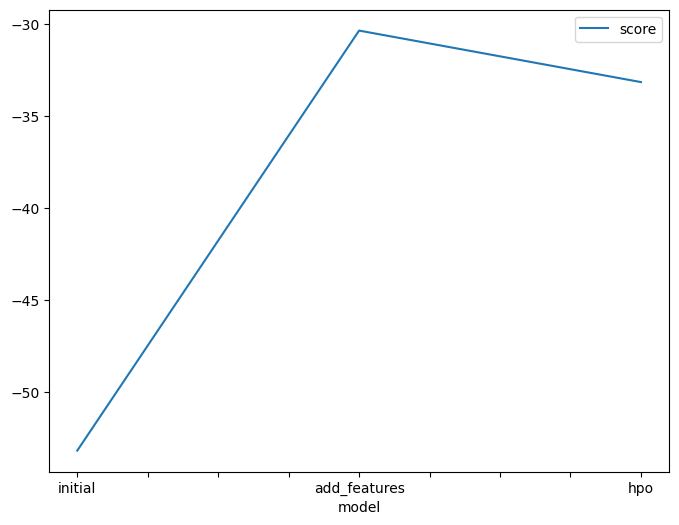

In [53]:
fig = pd.DataFrame(
    {
        "model": ["initial", "add_features", "hpo"],
        "score": [-53.15706018665353, -30.375110040662154, -33.16852027598393]
    }
).plot(x="model", y="score", figsize=(8, 6)).get_figure()
fig.savefig('model_train_score.png')

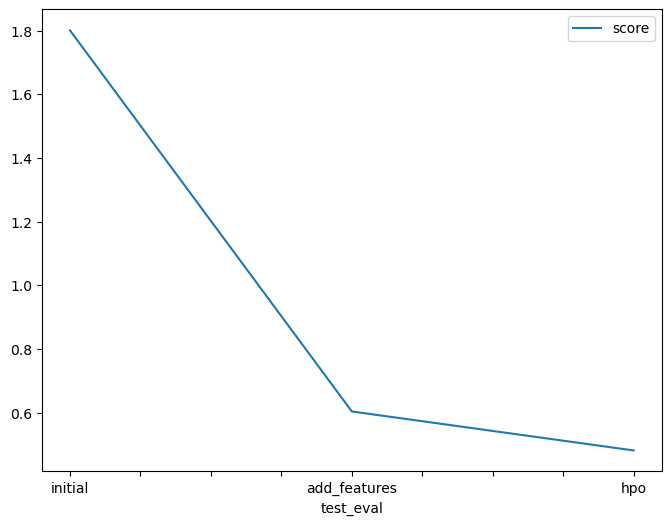

In [54]:
fig = pd.DataFrame(
    {
        "test_eval": ["initial", "add_features", "hpo"],
        "score": [1.80024, 0.60385, 0.48151]
    }
).plot(x="test_eval", y="score", figsize=(8, 6)).get_figure()
fig.savefig('model_test_score.png')

### Hyperparameter table

In [56]:
# 'GBM': {'num_boost_round': 100, 'num_leaves': Int: lower=20, upper=100, 'objective': 'huber'},
# 'XGB': {'tree_method': 'exact', 'min_child_weight': 2, 'sampling_method': 'gradient_based'},
# 'RF': {'max_features': 'log2'},

#'GBM': [{'extra_trees': True, 'ag_args': {'name_suffix': 'XT'}}, {}, 'GBMLarge'],
#'XGB': [{}, {'colsample_bytree': 0.6917311125174739, 'enable_categorical': False, 'learning_rate': 0.018063876087523967, 'max_depth': 10, 'min_child_weight': 0.6028633586934382, 'ag_args': {'name_suffix': '_r33', 'priority': -8}}, {'colsample_bytree': 0.6628423832084077, 'enable_categorical': False, 'learning_rate': 0.08775715546881824, 'max_depth': 5, 'min_child_weight': 0.6294123374222513, 'ag_args': {'name_suffix': '_r89', 'priority': -16}}],
#'RF': [{'criterion': 'gini', 'ag_args': {'name_suffix': 'Gini', 'problem_types': ['binary', 'multiclass']}}, {'criterion': 'entropy', 'ag_args': {'name_suffix': 'Entr', 'problem_types': ['binary', 'multiclass']}}, {'criterion': 'squared_error', 'ag_args': {'name_suffix': 'MSE', 'problem_types': ['regression', 'quantile']}}],
    
    
#'GBM': [{'extra_trees': True, 'ag_args': {'name_suffix': 'XT'}}, {}, 'GBMLarge'],
#'XGB': [{}, {'colsample_bytree': 0.6917311125174739, 'enable_categorical': False, 'learning_rate': 0.018063876087523967, 'max_depth': 10, 'min_child_weight': 0.6028633586934382, 'ag_args': {'name_suffix': '_r33', 'priority': -8}}, {'colsample_bytree': 0.6628423832084077, 'enable_categorical': False, 'learning_rate': 0.08775715546881824, 'max_depth': 5, 'min_child_weight': 0.6294123374222513, 'ag_args': {'name_suffix': '_r89', 'priority': -16}}],
#'RF': [{'criterion': 'gini', 'ag_args': {'name_suffix': 'Gini', 'problem_types': ['binary', 'multiclass']}}, {'criterion': 'entropy', 'ag_args': {'name_suffix': 'Entr', 'problem_types': ['binary', 'multiclass']}}, {'criterion': 'squared_error', 'ag_args': {'name_suffix': 'MSE', 'problem_types': ['regression', 'quantile']}}],
#'XT': [{'criterion': 'gini', 'ag_args': {'name_suffix': 'Gini', 'problem_types': ['binary', 'multiclass']}}, {'criterion': 'entropy', 'ag_args': {'name_suffix': 'Entr', 'problem_types': ['binary', 'multiclass']}}, {'criterion': 'squared_error', 'ag_args': {'name_suffix': 'MSE', 'problem_types': ['regression', 'quantile']}}],
    
    
pd.DataFrame({
    "model": ["GBM", "XGB", "RF"],
    "initial": ["'extra_trees': True", "'colsample_bytree': 0.6917311125174739, 'enable_categorical': False, 'learning_rate': 0.018063876087523967, 'max_depth': 10, 'min_child_weight': 0.6028633586934382", "'criterion': 'gini'"],
    "add_features": ["'extra_trees': True", "'colsample_bytree': 0.6917311125174739, 'enable_categorical': False, 'learning_rate': 0.018063876087523967, 'max_depth': 10, 'min_child_weight': 0.6028633586934382", "'criterion': 'gini'"],
    "hpo": ["'num_boost_round': 100, 'num_leaves': Int: lower=20, upper=100, 'objective': 'huber'", "'tree_method': 'exact', 'min_child_weight': 2, 'sampling_method': 'gradient_based'", "'max_features': 'log2'"],
    "score": [1.80024, 0.60385, 0.48151]
})

,model,initial,add_features,hpo,score
0,GBM,'extra_trees': True,'extra_trees': True,"'num_boost_round': 100, 'num_leaves': Int: lower=20, upper=100, 'objective': 'huber'",1.80024
1,XGB,"'colsample_bytree': 0.6917311125174739, 'enable_categorical': False, 'learning_rate': 0.018063876087523967, 'max_depth': 10, 'min_child_weight': 0.6028633586934382","'colsample_bytree': 0.6917311125174739, 'enable_categorical': False, 'learning_rate': 0.018063876087523967, 'max_depth': 10, 'min_child_weight': 0.6028633586934382","'tree_method': 'exact', 'min_child_weight': 2, 'sampling_method': 'gradient_based'",0.60385
2,RF,'criterion': 'gini','criterion': 'gini','max_features': 'log2',0.48151
